<a href="https://colab.research.google.com/github/Diksha-Bora/Data-Science-project/blob/main/DecisionTree17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
# IMPORTING REQUIRED LIBRARIES
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
data = pd.read_csv("/content/adult.csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [81]:
# DATA PREPROCESSING
new_col=[]
for i in data.columns:
  new_col.append("col_"+str(i))
data.columns = new_col
data.head()  

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [82]:
data = data.drop(["col_10","col_11"],axis=1)
data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_12,col_13,col_14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col_0   32561 non-null  int64 
 1   col_1   32561 non-null  object
 2   col_2   32561 non-null  int64 
 3   col_3   32561 non-null  object
 4   col_4   32561 non-null  int64 
 5   col_5   32561 non-null  object
 6   col_6   32561 non-null  object
 7   col_7   32561 non-null  object
 8   col_8   32561 non-null  object
 9   col_9   32561 non-null  object
 10  col_12  32561 non-null  int64 
 11  col_13  32561 non-null  object
 12  col_14  32561 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [84]:
cat_col=[]
num_col=[]
for i in data.columns:
  if(data[i].dtype=="object"):
    cat_col.append(i)
  else:
    num_col.append(i)
print(cat_col)
print(num_col)


['col_1', 'col_3', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_13', 'col_14']
['col_0', 'col_2', 'col_4', 'col_12']


In [85]:
from sklearn.preprocessing import LabelEncoder
for i in cat_col:
  le = LabelEncoder()
  encoded = le.fit_transform(data[i])
  data[i+"_encoded"] = encoded

In [86]:
data = data.drop(cat_col,axis =1)

In [87]:
data.head()

,col_0,col_2,col_4,col_12,col_1_encoded,col_3_encoded,col_5_encoded,col_6_encoded,col_7_encoded,col_8_encoded,col_9_encoded,col_13_encoded,col_14_encoded
0,39,77516,13,40,7,9,4,1,1,4,1,39,0
1,50,83311,13,13,6,9,2,4,0,4,1,39,0
2,38,215646,9,40,4,11,0,6,1,4,1,39,0
3,53,234721,7,40,4,1,2,6,0,2,1,39,0
4,28,338409,13,40,4,9,2,10,5,2,0,5,0


In [88]:
x = data.drop("col_14_encoded",axis=1)
y = data['col_14_encoded']

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45,stratify=y)

In [90]:
#MODEL SELECTION 
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="gini",max_depth=4)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

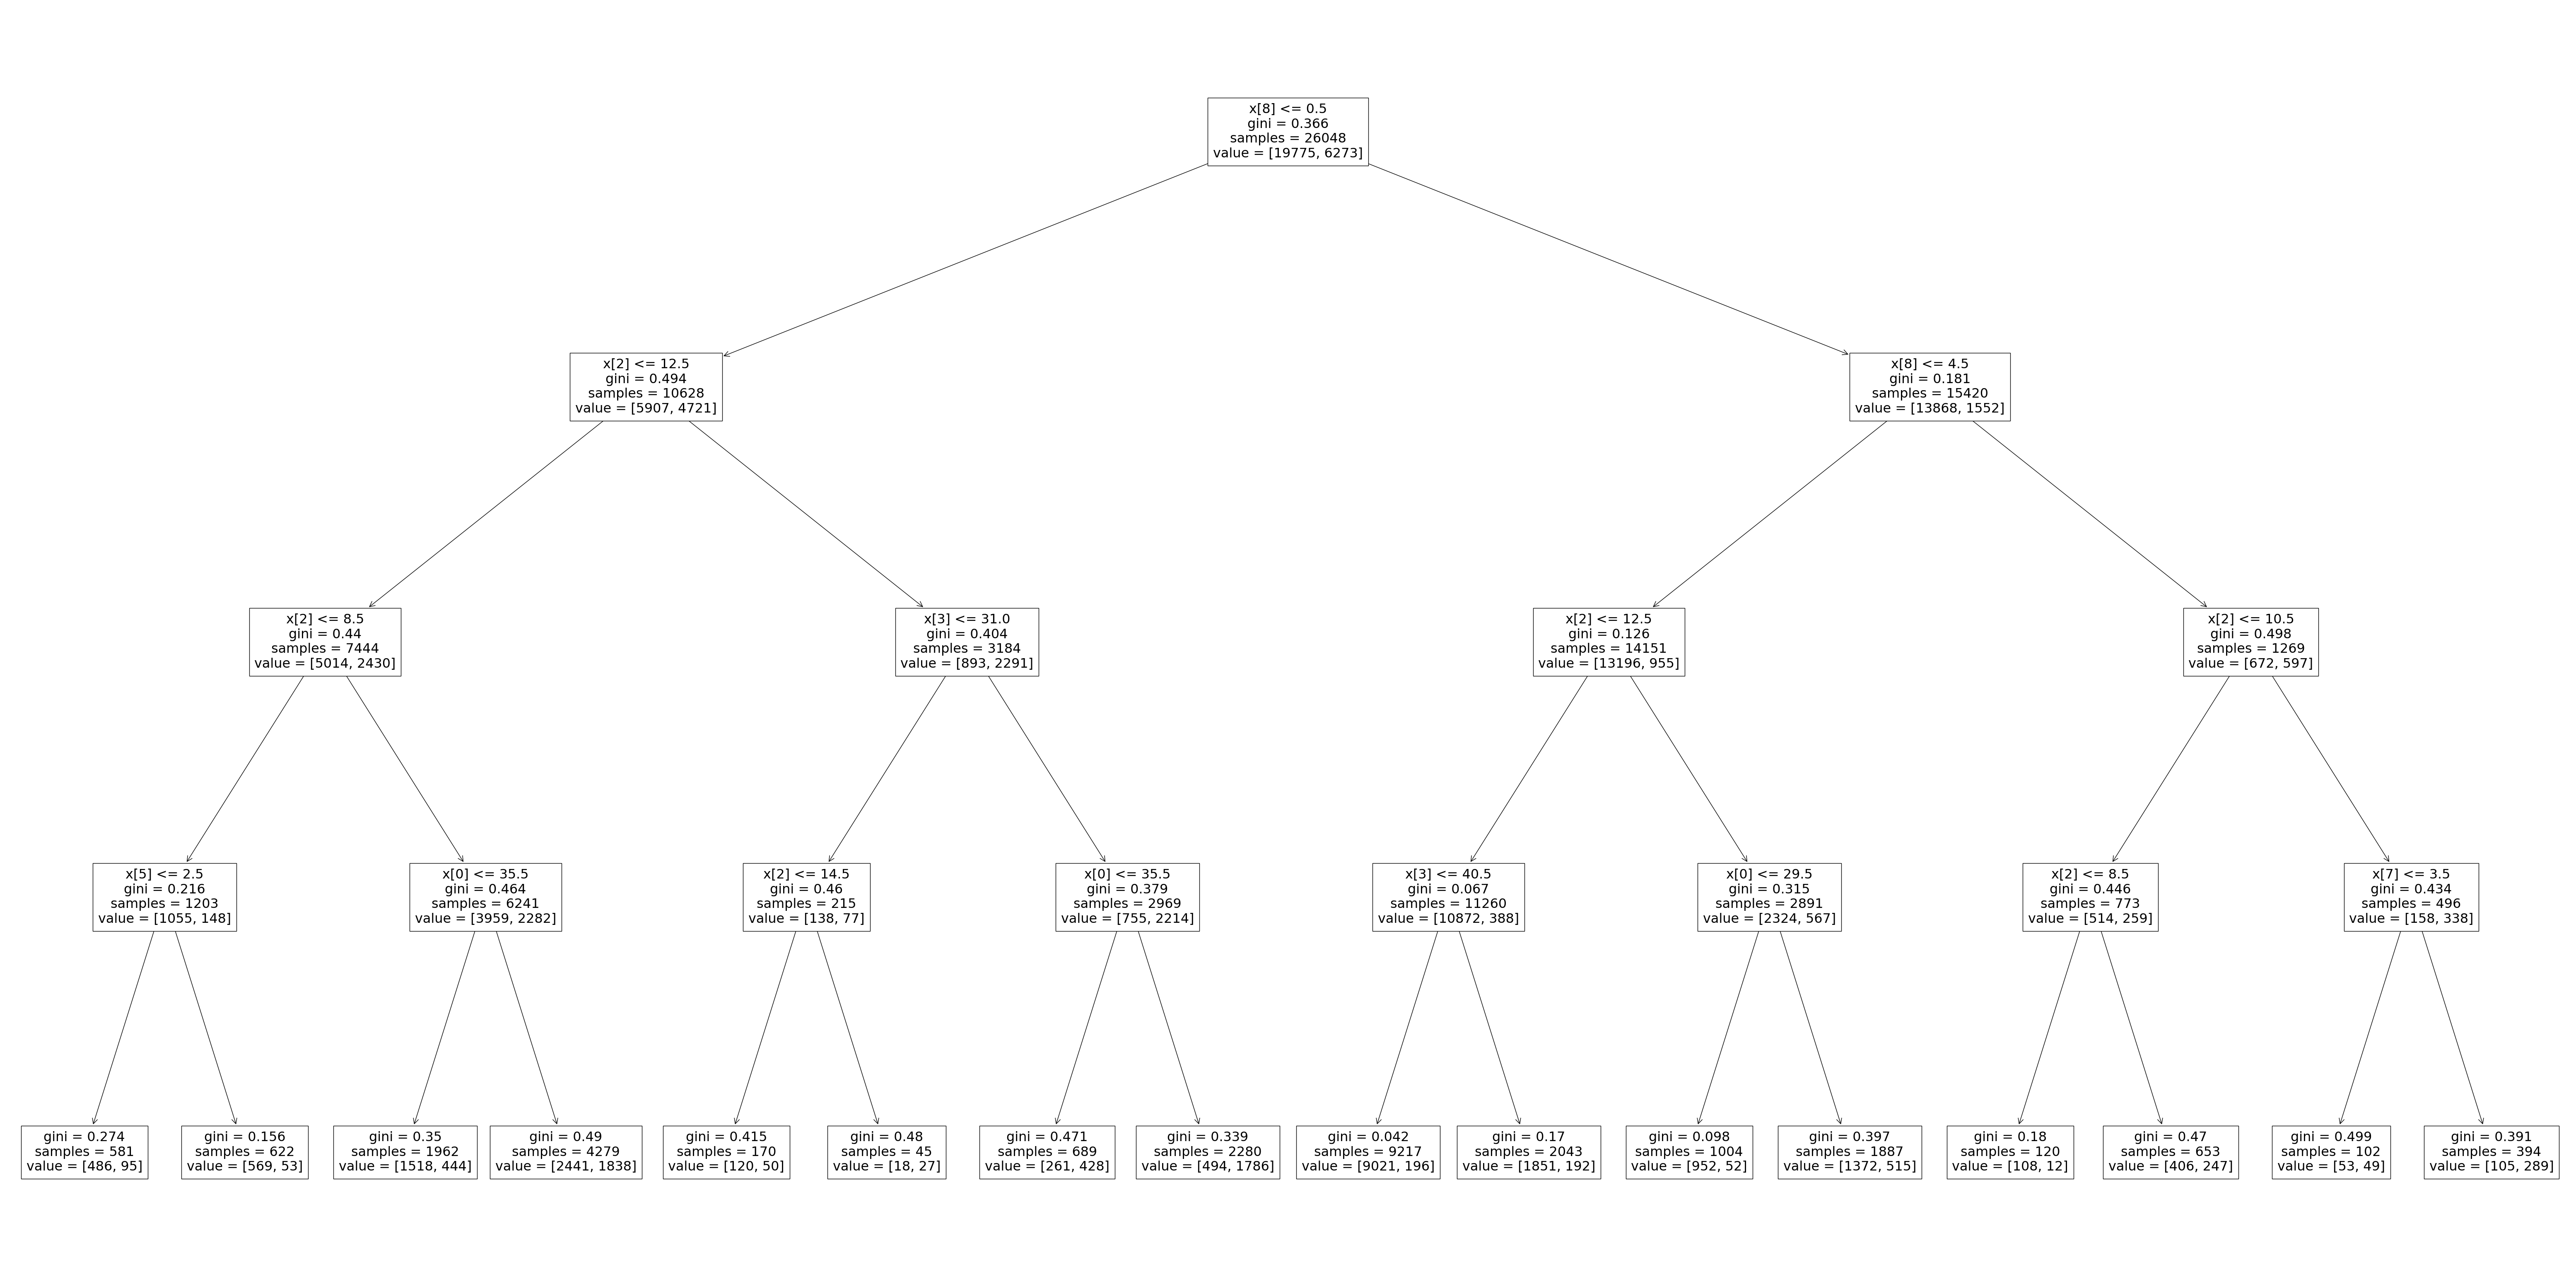

In [91]:
from sklearn.tree import plot_tree
plt.figure(figsize=[80,40])
plot_tree(dtc)
plt.show()

In [92]:
y_pred_train = dtc.predict(x_train)
y_pred_test = dtc.predict(x_test)

In [93]:
# MODEL EVALUATION 
from sklearn.metrics import accuracy_score,classification_report
print("TRAIN")
print("accuracy_score:",accuracy_score(y_train,y_pred_train))
print("\nclassification_report:",classification_report(y_train,y_pred_train))
print("TEST")
print("accuracy_score:",accuracy_score(y_test,y_pred_test))
print("\nclassification_report:",classification_report(y_test,y_pred_test))

TRAIN
accuracy_score: 0.8225967444717445

classification_report:               precision    recall  f1-score   support

           0       0.83      0.96      0.89     19775
           1       0.74      0.40      0.52      6273

    accuracy                           0.82     26048
   macro avg       0.79      0.68      0.71     26048
weighted avg       0.81      0.82      0.80     26048

TEST
accuracy_score: 0.8251189927836634

classification_report:               precision    recall  f1-score   support

           0       0.84      0.96      0.89      4945
           1       0.75      0.41      0.53      1568

    accuracy                           0.83      6513
   macro avg       0.80      0.68      0.71      6513
weighted avg       0.82      0.83      0.80      6513

